##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:  
entraine un modèle pour prédiction

Prend en entrée les fichiers:  
    (processed)/*train* et *test*: Fichiers des données séparées en train+test  
  
Fournit en sortie les fichiers:  
     (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test.csv, y_train.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.  
     (models)/*.pkl , optionnellement  


# Initialisations, librairies

In [4]:
from init_notebook import *
import sys
sys.path.append('../')  # Add the parent directory to the system path
from common_co2 import load_our_data

In [5]:
# Pour une exécution indépendante des travaux sur chaque modèle: Charger les données depuis les fichiers CSV

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('future.no_silent_downcasting', True)
              

In [ ]:
# pour ceux qui veulent utiliser mlflow pour le suivi des expériences
!pip install mlflow


# Régression linéaire simple

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
X_train_scaled, X_test_scaled, y_train, y_test = load_our_data()

# Sélectionner uniquement la variable explicative 'ec (cm3)'
X_train_ec = X_train_scaled[['ec (cm3)']]
X_test_ec = X_test_scaled[['ec (cm3)']]

# Initialiser et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_ec, y_train)

# Prédire sur les données de test
y_pred = linear_model.predict(X_test_ec)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Mean Squared Error (MSE) sur les données de test : {mse:.2f}")
print(f"Coefficient de Détermination (R²) sur les données de test : {r2:.2f}")

# Afficher les paramètres du modèle
print("Paramètres du modèle :")
print(f" - Coefficient (pente) : {linear_model.coef_[0]:.4f}")
print(f" - Intercept (ordonnée à l'origine) : {linear_model.intercept_:.4f}")


Mean Squared Error (MSE) sur les données de test : 2586.02
Coefficient de Détermination (R²) sur les données de test : 0.23
Paramètres du modèle :
 - Coefficient (pente) : 21.6828
 - Intercept (ordonnée à l'origine) : 152.6320


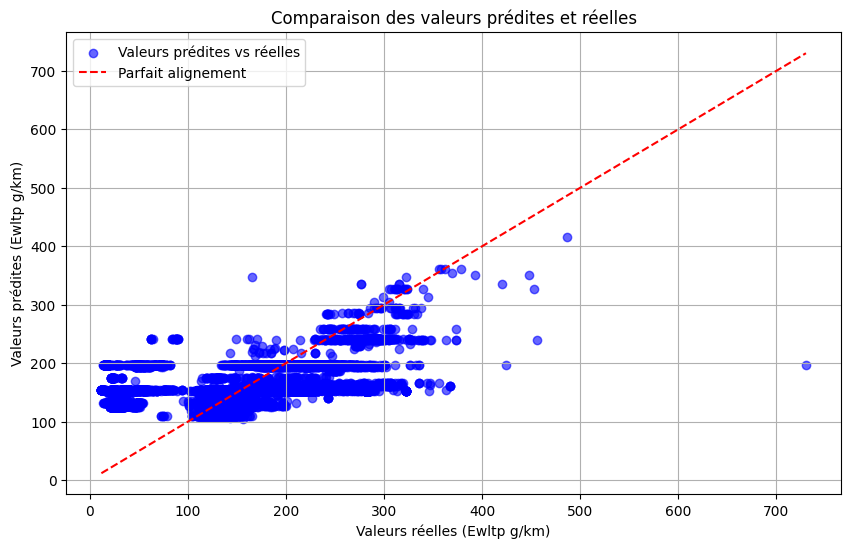

In [7]:
import matplotlib.pyplot as plt

# Tracer les valeurs prédites et réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Valeurs prédites vs réelles')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Parfait alignement')
plt.xlabel('Valeurs réelles (Ewltp g/km)')
plt.ylabel('Valeurs prédites (Ewltp g/km)')
plt.title('Comparaison des valeurs prédites et réelles')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# sauvegarder le modèle
import joblib
import os

joblib.dump(linear_model, base_models + 'reg_linear_simple.pkl')

['../models/reg_linear_simple.pkl']

# Régression linéaire multiple

In [4]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()

NameError: name 'load_our_data' is not defined

In [ ]:
# En cas de besoin de faire le point
"""
print("Notre dataframe a le format suivant:")
print(X_train_scaled.head(3))
print("print(y_train)")
print(y_train)
print("y_train.info()")
y_train.info()
print("print(y_test)")
print(y_test)
"""

In [ ]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

In [ ]:
# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")


MSE: 294.6944693127561
R^2: 0.9118129642370327


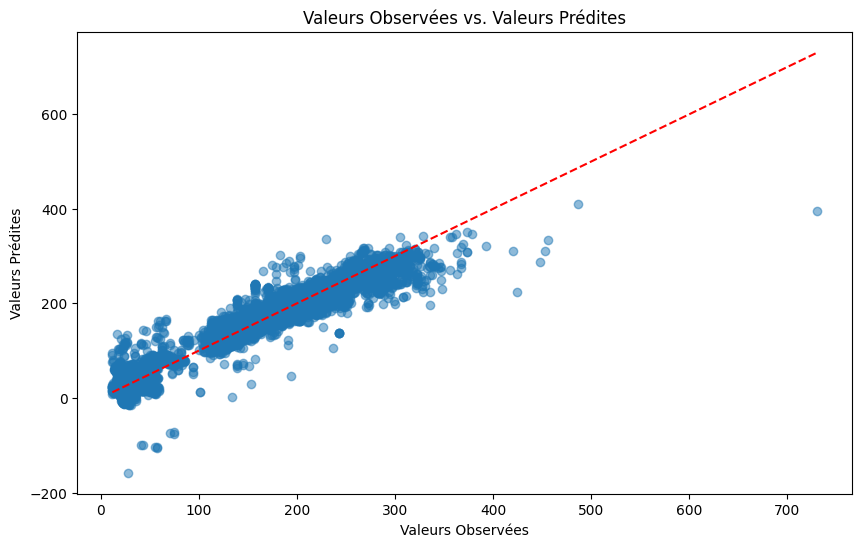

c:\Users\local\anaconda\envs\DST\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


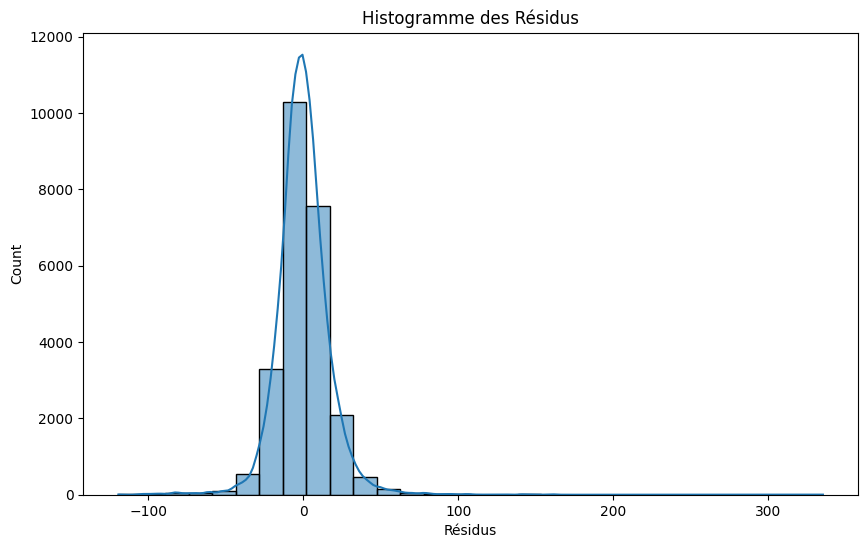

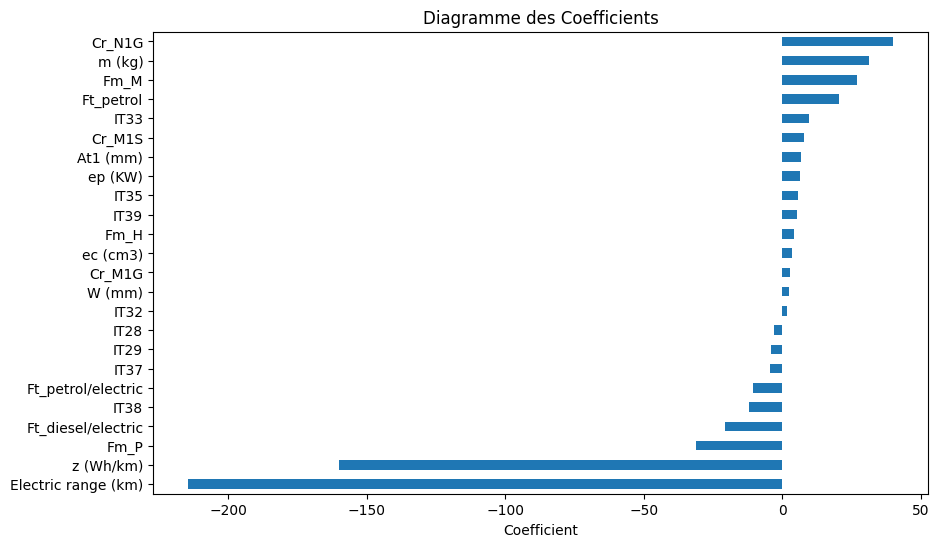

Au vu de ces coefficients, je crains un surajustement sur les valeurs électriques.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagramme de dispersion des valeurs observées vs. les valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Observées vs. Valeurs Prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité
plt.show()

# Histogramme des résidus
residus = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, bins=30)
plt.xlabel('Résidus')
plt.title('Histogramme des Résidus')
plt.show()

# Diagramme des coefficients
coefficients = pd.DataFrame(model.coef_, X_train_scaled.columns, columns=['Coefficient']).sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Diagramme des Coefficients')
plt.show()

print("Au vu de ces coefficients, je crains un surajustement sur les valeurs électriques.")


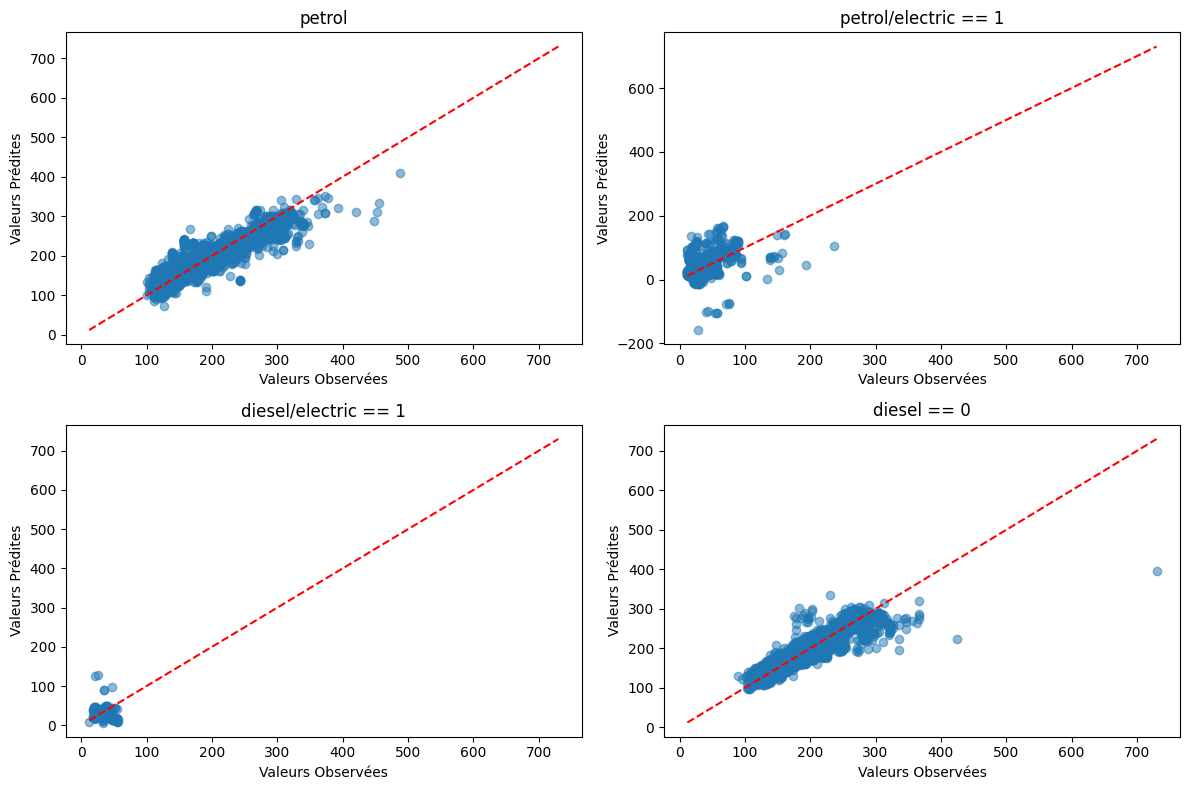

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les données en fonction des différentes conditions
Ft_petrol_1 = X_test_scaled[X_test_scaled['Ft_petrol'] == 1]
y_test_Ft_petrol_1 = y_test[X_test_scaled['Ft_petrol'] == 1]
y_pred_Ft_petrol_1 = model.predict(Ft_petrol_1)

Ft_petrol_electric_1 = X_test_scaled[X_test_scaled['Ft_petrol/electric'] == 1]
y_test_Ft_petrol_electric_1 = y_test[X_test_scaled['Ft_petrol/electric'] == 1]
y_pred_Ft_petrol_electric_1 = model.predict(Ft_petrol_electric_1)

Ft_diesel_electric_1 = X_test_scaled[X_test_scaled['Ft_diesel/electric'] == 1]
y_test_Ft_diesel_electric_1 = y_test[X_test_scaled['Ft_diesel/electric'] == 1]
y_pred_Ft_diesel_electric_1 = model.predict(Ft_diesel_electric_1)

Ft_none = X_test_scaled[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_test_Ft_none = y_test[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_pred_Ft_none = model.predict(Ft_none)

# Créer les diagrammes de dispersion
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test_Ft_petrol_1, y_pred_Ft_petrol_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 2)
plt.scatter(y_test_Ft_petrol_electric_1, y_pred_Ft_petrol_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol/electric == 1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 3)
plt.scatter(y_test_Ft_diesel_electric_1, y_pred_Ft_diesel_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel/electric == 1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 4)
plt.scatter(y_test_Ft_none, y_pred_Ft_none, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel == 0')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(model, base_models + 'reg_linear_multiple.pkl')

['../models/reg_linear_multiple.pkl']

In [ ]:
# validation croisée
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=8, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Average R^2:", scores.mean())

Cross-validated R^2 scores: [0.90578518 0.91284724 0.9113829  0.90693477 0.90933526 0.90243994
 0.90807949 0.91205382]
Average R^2: 0.9086073235681378


Les scores  de la validation croisée sont cohérents à travers les différentes itérations, le modèle est stable, ne dépend pas fortement de la partition spécifique des données, a une bonne capacité de généralisation.

C:\Users\abcd3\AppData\Local\Temp\ipykernel_15484\2386970137.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


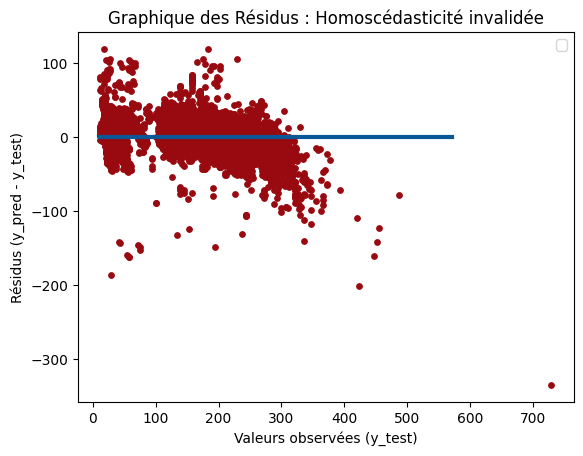

In [ ]:
residus = y_pred - y_test

plt.scatter(y_test, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')
plt.title("Graphique des Résidus : Homoscédasticité invalidée")

# Ajouter des labels et une légende
plt.xlabel("Valeurs observées (y_test)")
plt.ylabel("Résidus (y_pred - y_test)")
plt.legend()
plt.show()

Les résidus montrent une déviation vers les valeurs négatives pour les valeurs 
les plus élevées. Cela signifie que le modèle a tendance à sous-estimer les 
valeurs les plus élevées.
On n'a donc pas d'homosscédasticité.

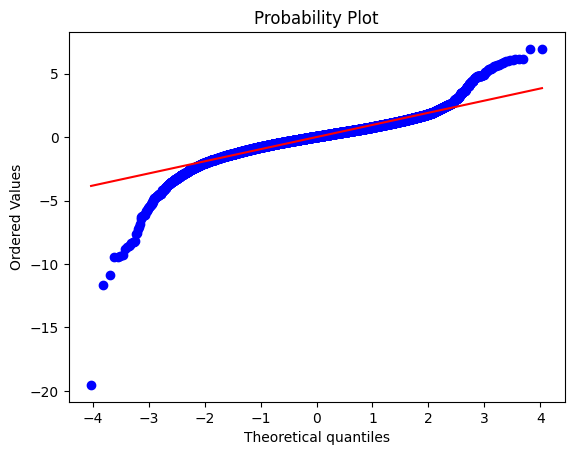

In [ ]:
import scipy.stats as stats
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)
plt.show();

La distribution n'est pas normale, même si elle n'en est pas très éloignée.   
on va maintenant tenter de réduire le nombre de variables pour savoir si cela améliore le modèle.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sk = SelectKBest(f_regression, k=20)

sk.fit(X = X_train_scaled, y = y_train)

X_train_scaled.columns[sk.get_support()]


Index(['m (kg)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'Electric range (km)', 'IT28', 'IT29', 'IT32', 'IT33', 'IT37',
       'Ft_diesel/electric', 'Ft_petrol', 'Ft_petrol/electric', 'Cr_M1G',
       'Cr_M1S', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')

In [ ]:
sk_train = sk.transform(X_train_scaled)
sk_test = sk.transform(X_test_scaled)

sklr = LinearRegression()
sklr.fit(sk_train, y_train)

print("score sur jeu d'entraînement", sklr.score(sk_train, y_train))
print("score sur jeu de tet", sklr.score(sk_test, y_test))

# Prédictions
y_train_pred = sklr.predict(sk_train)
y_test_pred = sklr.predict(sk_test)

# Calcul et affichage du MSE
print("MSE sur jeu d'entraînement :", mean_squared_error(y_train, y_train_pred))
print("MSE sur jeu de test :", mean_squared_error(y_test, y_test_pred))

# Calcul et affichage du R²
print(f"R² sur jeu d'entraînement : {r2_score(y_train, y_train_pred):.4f}")
print(f"R² sur jeu de test : {r2_score(y_test, y_test_pred):.4f}")

score sur jeu d'entraînement 0.9088207869101615
score sur jeu de tet 0.9118123166913003
MSE sur jeu d'entraînement : 301.79383864080637
MSE sur jeu de test : 294.6966332152428
R² sur jeu d'entraînement : 0.9088207869101615
R² sur jeu de test : 0.9118123166913003


avec 20 variables explicatives, le modèle est quasiment aussi performant qu'avec toutes les 24 variables.  
En deça de 20 variables, le modèle perd en performance.

Fin d'exploration du modèle de regression linéaire multiple  
  
***

# Modèle Ridge

In [28]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Modèle de regression Ridge
ridge = Ridge()

# Grille des hyperparamètres à tester
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparameters:", grid_search.best_params_)
print("Meilleur R^2 score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Performance du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on test set: {mse}")
print(f"R^2 on test set: {r2}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient'])
print(coefficients)


Meilleurs hyperparameters: {'alpha': 0.1}
Meilleur R^2 score: 0.9086820975651412
MSE on test set: 294.6791294371098
R^2 on test set: 0.9118175546800273
                     Coefficient
m (kg)                 31.136424
W (mm)                  2.275516
At1 (mm)                6.713260
ec (cm3)                3.393039
ep (KW)                 6.287127
z (Wh/km)            -159.861910
Electric range (km)  -213.667590
IT28                   -3.051517
IT29                   -4.184945
IT32                    1.654850
IT33                    9.716175
IT35                    5.426340
IT37                   -4.597014
IT38                  -11.125598
IT39                    4.791517
Ft_diesel/electric    -20.751067
Ft_petrol              20.429508
Ft_petrol/electric    -10.557071
Cr_M1G                  2.561037
Cr_M1S                  7.734697
Cr_N1G                 37.932286
Fm_H                    4.386283
Fm_M                   26.921860
Fm_P                  -31.308140


Le résultat est iperceptiblement meilleur que la regression simple.

essayons une grille plus fine autour de la meilleure valeur trouvée (0.1), ainsi que d'autres valeurs potentiellement intéressantes.

In [ ]:
param_grid = {
    'alpha': [0.01, 0.05, 0.08, 0.09, 0.1, 0.11, 0.12, 0.25, 0.3, 0.38, 0.4, 0.42, 0.44, 0.5, 0.6, 1.0, 1.1, 5.0, 10.0, 100.0]
}

# Recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparameters:", grid_search.best_params_)
print("Meilleur R^2 score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Performance du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on test set: {mse}")
print(f"R^2 on test set: {r2}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient'])
#print(coefficients)


In [ ]:
# on affine encore autour du alpha trouvé

param_grid = {
    'alpha': [0.405, 0.4052]
}

# Recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparameters:", grid_search.best_params_)
print("Meilleur R^2 score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Performance du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on test set: {mse}")
print(f"R^2 on test set: {r2}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient'])
#print(coefficients)
# meilleru alpha = 0.405:  0.9118304475721715


In [ ]:
# Créer les graphiques comme pour la regression linéaire

our_title="Ridge et alpha=0.4"

# Diagramme de dispersion des valeurs observées vs. les valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Observées vs. Valeurs Prédites avec ' + our_title)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité
plt.show()

# Histogramme des résidus
residus = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, bins=30)
plt.xlabel('Résidus')
plt.title('Histogramme des Résidus avec ' + our_title)
plt.show()

# Diagramme des coefficients
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient']).sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Diagramme des Coefficients pour ' + our_title)
plt.show()

# Diagrammes "valeurs observées vs valeurs prédites" pour les différentes conditions

# Filtrer les données en fonction des différentes conditions
Ft_petrol_1 = X_test_scaled[X_test_scaled['Ft_petrol'] == 1]
y_test_Ft_petrol_1 = y_test[X_test_scaled['Ft_petrol'] == 1]
y_pred_Ft_petrol_1 = best_model.predict(Ft_petrol_1)

Ft_petrol_electric_1 = X_test_scaled[X_test_scaled['Ft_petrol/electric'] == 1]
y_test_Ft_petrol_electric_1 = y_test[X_test_scaled['Ft_petrol/electric'] == 1]
y_pred_Ft_petrol_electric_1 = best_model.predict(Ft_petrol_electric_1)

Ft_diesel_electric_1 = X_test_scaled[X_test_scaled['Ft_diesel/electric'] == 1]
y_test_Ft_diesel_electric_1 = y_test[X_test_scaled['Ft_diesel/electric'] == 1]
y_pred_Ft_diesel_electric_1 = best_model.predict(Ft_diesel_electric_1)

Ft_none = X_test_scaled[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_test_Ft_none = y_test[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_pred_Ft_none = best_model.predict(Ft_none)

# Créer les diagrammes de dispersion
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.scatter(y_test_Ft_petrol_1, y_pred_Ft_petrol_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 2)
plt.scatter(y_test_Ft_petrol_electric_1, y_pred_Ft_petrol_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol/electric')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 3)
plt.scatter(y_test_Ft_diesel_electric_1, y_pred_Ft_diesel_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel/electric')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 4)
plt.scatter(y_test_Ft_none, y_pred_Ft_none, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.tight_layout()
plt.show()

Idées d'améliorations pour modèle Ridge:  
  
Paramètres d'Estimation  
Solver : Le paramètre solver dans Ridge Regression détermine la méthode utilisée pour ajuster le modèle. Essayer différentes valeurs pour voir si elles améliorent les performances.  
Par exemple : solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'].  
  
Recherche d'Hypothèses Alternatives  
Polynomial Features : Utiliser PolynomialFeatures pour créer des interactions entre les caractéristiques et voir si un modèle polynomial Ridge améliore les performances.

In [ ]:
"""
# Ici nous faisons une estimation de temps pour la suite de l'optimisation des hyperparamètres

import time
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures

# Ajouter des caractéristiques polynomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sélection des meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k='all')
X_train_best = selector.fit_transform(X_train_poly, y_train)
X_test_best = selector.transform(X_test_poly)


# Définir le modèle de Ridge Regression
ridge = Ridge()

# Définir la grille des hyperparamètres à tester
param_grid = {
    'alpha': [0.4],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'max_iter': [50]
}

# Mettre en place la recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# Temps d'exécution d'une seule itération
start_time = time.time()

# Effectuer une seule itération de la recherche par grille
grid_search.fit(X_train_best, y_train)

end_time = time.time()
single_iteration_time = end_time - start_time
print(f"Time taken for a single iteration: {single_iteration_time} seconds")

# Calculer le nombre total de combinaisons hyperparamètres
total_combinations = len(param_grid['alpha']) * len(param_grid['solver']) * len(param_grid['max_iter'])
total_iterations = total_combinations * 5  # 5 folds in cross-validation

# Estimer le temps total
estimated_total_time = single_iteration_time * total_iterations
print(f"Estimated total time for grid search: {estimated_total_time / 60} minutes")
"""

Essai du 06/03/2025:
   sans n_jobs
   Time taken for a single iteration: 81.56777310371399 seconds
   Estimated total time for grid search: 40.783886551856995 minutes
   
   njobs=-1:
   Time taken for a single iteration: 20.959975481033325 seconds
   Estimated total time for grid search: 10.479987740516663 minutes


In [ ]:
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Ajouter des caractéristiques polynomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sélection des meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k='all')
X_train_best = selector.fit_transform(X_train_poly, y_train)
X_test_best = selector.transform(X_test_poly)

# Définir le pipeline de standardisation et de modélisation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Définir la grille des hyperparamètres à tester
param_grid = {
    'ridge__alpha': [0.7, 0.75, 0.8],
    'ridge__solver': ['saga'],
#    'ridge__max_iter': [1000, 2000, 3000, 5000]
    'ridge__max_iter': [3000] # attention, temps de calcul sensible
}

# Mettre en place la recherche par grille
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
# essayer cv=3 et voir njobs=-1

start_time= time.time()
# Effectuer la recherche par grille
grid_search.fit(X_train_best, y_train)

# Afficher les meilleurs hyperparamètres et le score correspondant
print("Meilleurs hyperparamètres (jeu d'entraînement):", grid_search.best_params_)
print("Meilleur R^2 score  (jeu d'entraînement):", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_best)

# Évaluer la performance du modèle sur l'ensemble de test
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error sur jeu de test: {mse}")
print(f"R^2 sur jeu de test: {r2}")

# Access the Ridge model within the pipeline to retrieve the coefficients
ridge_model = best_model.named_steps['ridge']

# Get the coefficients
coefficients = pd.DataFrame(ridge_model.coef_, poly.get_feature_names_out(X_train_scaled.columns), columns=['Coefficient'])
print(coefficients)

end_time = time.time()
single_iteration_time = end_time - start_time
print(f"Time taken : {single_iteration_time} seconds")


Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.75, 'ridge__max_iter': 3000, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.9493526974868318
Mean Squared Error sur jeu de test: 163.31536086006318
R^2 sur jeu de test: 0.9511280357503985
           Coefficient
m (kg)       12.693927
W (mm)        1.272656
At1 (mm)      4.178339
ec (cm3)      1.836265
ep (KW)       2.461775
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.932203
Fm_M Fm_P     0.000000
Fm_P^2       -4.234895

[324 rows x 1 columns]
Time taken : 1077.631917476654 seconds


Pour  
param_grid = {  
    'ridge__alpha': [0.01, 0.35, 0.4, 0.45, 1.0],  
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  
    'ridge__max_iter': [10, 50]  
}  
  
Meilleurs hyperparamètres: {'ridge__alpha': 1.0, 'ridge__max_iter': 50, 'ridge__solver': 'sparse_cg'}  
Meilleur R^2 score: 0.949287384746364  
MSE on test set: 162.4939231227601  
R^2 on test set: 0.9513738502011602  
           Coefficient  
m (kg)       15.081176
W (mm)       -0.245503
At1 (mm)      3.468106
ec (cm3)      1.653317
ep (KW)       1.950622
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.938673
Fm_M Fm_P     0.000000
Fm_P^2       -4.241753

***  

Pour   
param_grid = {  
    'ridge__alpha': [0.5, 1, 2.0, 4.0],  
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  
    'ridge__max_iter': [150, 1500]  
}  
Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 1, 'ridge__max_iter': 1500, 'ridge__solver': 'saga'}  
Meilleur R^2 score  (jeu d'entraînement): 0.9492732527654555  
Mean Squared Error sur jeu de test: 163.75000944398613  
R^2 sur jeu de test: 0.9509979675807986  
exécution windows: 143 min 56 s  
execution linux : < 105 min

***

    'ridge__alpha': [0.9, 1, 1.1],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'ridge__max_iter': [2000]
pas de warning sur max_iter
Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.9, 'ridge__max_iter': 2000, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.9493525315362694
Mean Squared Error sur jeu de test: 163.31534166714258
R^2 sur jeu de test: 0.9511280414938615
           Coefficient
m (kg)       12.693583
W (mm)        1.272751
At1 (mm)      4.178403
ec (cm3)      1.836487
ep (KW)       2.461812
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.932144
Fm_M Fm_P     0.000000
Fm_P^2       -4.234718

[324 rows x 1 columns]
Time taken : 5896.527683019638 seconds (98 min)

***

param_grid = {
    'ridge__alpha': [0.8, 0.85, 0.9, 0.95],
    'ridge__solver': ['saga'],
    'ridge__max_iter': [1500]
}
1 warning sur max_iter
20 min

Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.8, 'ridge__max_iter': 1500, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.949273221232346
Mean Squared Error sur jeu de test: 163.74965083382628
R^2 sur jeu de test: 0.9509980748945431
           Coefficient
m (kg)       12.065512
W (mm)        1.654133
At1 (mm)      4.357518
ec (cm3)      1.899612
ep (KW)       2.616687
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.948384
Fm_M Fm_P     0.000000
Fm_P^2       -4.239006

[324 rows x 1 columns]
Time taken : 1224.0648322105408 seconds


Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.7, 'ridge__max_iter': 3000, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.9493528180361077  
Mean Squared Error sur jeu de test: 163.31494480794666  
R^2 sur jeu de test: 0.9511281602535931  
           Coefficient
m (kg)       12.694278
W (mm)        1.272333
At1 (mm)      4.178383
ec (cm3)      1.835901
ep (KW)       2.462083
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.932225
Fm_M Fm_P     0.000000
Fm_P^2       -4.234947

[324 rows x 1 columns]
Time taken : 1226.0600080490112 seconds (20' 26" mais le n_jobs=-1 ne permet d'utiliser 100% CPU que les premières minutes). 19'22" sous Linux
Ceci est le meilleur résultat Ridge pour l'instant. J'arrête les recherches ici. 06/03/2025.



Fin de Ridge

***  

# K-NN

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()
# Afficher les colonnes de X_train_scaled au besoin
"""
print(X_train_scaled.columns)
print("..   ")
print(y_train.head(3))
"""


Index(['m (kg)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'Electric range (km)', 'IT28', 'IT29', 'IT32', 'IT33', 'IT35', 'IT37',
       'IT38', 'IT39', 'Ft_diesel/electric', 'Ft_petrol', 'Ft_petrol/electric',
       'Cr_M1G', 'Cr_M1S', 'Cr_N1G', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')
..   
0     30.0
1     36.0
2    159.0
Name: Ewltp (g/km), dtype: float64


In [ ]:
# On va utiliser mlflow pour suivre les expériences et les résultats

import mlflow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Distribution des hyperparamètres à tester
param_distributions = {
    'n_neighbors': [2, 3, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev'],
    'p': [1, 2]  # Only used with 'minkowski' metric
}

# On initialise un k-NN classifier
knn = KNeighborsClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Adjust scoring metric if necessary
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
    random_state=42  # Ensures reproducibility
)

# Start MLflow experiment
mlflow.set_experiment("CO2")

with mlflow.start_run(run_name="kNN_randomSearch_2_0"):
    # Fit RandomizedSearchCV to your data (X_train, y_train)
    random_search.fit(X_train_scaled, y_train)
    
    # Log the best parameters
    best_params = random_search.best_params_
    mlflow.log_params(best_params)
    
    # Log the best score
    best_score = random_search.best_score_
    mlflow.log_metric("best_score", best_score)

    # Log all tested combinations and scores
    for i, (params, mean_test_score) in enumerate(zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score'])):
        with mlflow.start_run(run_name=f"Combination_{i+1}", nested=True):  # Nested run for each parameter combination
            mlflow.log_params(params)
            mlflow.log_metric("mean_test_score", mean_test_score)

# Output the best parameters
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


NameError: name 'X_train_scaled' is not defined

In [7]:
# refait avec randomsearch case au dessus
import mlflow
import mlflow.sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the k-NN model
knn = KNeighborsRegressor()

# Define a parameter grid for optimization
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]  # Only used with 'minkowski' metric
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Start the MLflow experiment
mlflow.set_experiment("CO2")

with mlflow.start_run(run_name="kNN_GridSearch_03"):
    # Fit the model to the training data
    grid_search.fit(X_train_scaled, y_train)

    # Log the best parameters and final results
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("best_mean_score", -grid_search.best_score_)  # Negate since scoring is neg_mean_squared_error
    
    print("Best parameters:", grid_search.best_params_)
    print(f"Best mean squared error (MSE): {-grid_search.best_score_}")

    # Nested runs for each parameter combination
    for params, mean_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
        with mlflow.start_run(run_name=f"kNN_{params['n_neighbors']}_neighbors", nested=True):
            mlflow.log_params(params)
            mlflow.log_metric("mean_score", -mean_score)  # Negate to log as positive MSE

    # Predict on the test data using the best model
    best_knn = grid_search.best_estimator_
    y_pred_tst = best_knn.predict(X_test_scaled)
    mse_tst = mean_squared_error(y_test, y_pred_tst)
    r2_score_tst = best_knn.score(X_test_scaled, y_test)

    # Log test metrics
    mlflow.log_metric("test_mse", mse_tst)
    mlflow.log_metric("test_r2", r2_score_tst)

    print(f"Test MSE: {mse_tst}")
    print(f"Test R2 score: {r2_score_tst}")


Best parameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best mean squared error (MSE): 56.819616599732385
Test MSE: 52.838747182084454
Test R2 score: 0.9841880558590613


In [ ]:
# 20250310 13:41 I try a re-write of all this in the cell above, using mlflow
"""
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialisation du modèle k-NN
knn = KNeighborsRegressor()

# Définir une grille de recherche pour optimiser le modèle (par ex. le nombre de voisins k)
param_grid = {
    'n_neighbors': [3, 5, 10, 20],  # Différentes valeurs de k
    'weights': ['uniform', 'distance'],  # Pondération des voisins
    'p': [1, 2],  # Distance de Minkowski (p=1 pour Manhattan, p=2 pour Euclidienne)
    'metric': ['minkowski', 'manhattan']  # Métrique de distance
    # and leaf_size by default is 30
}

# Configuration de la recherche de grille avec validation croisée
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Mesurer l'erreur quadratique moyenne
    #n_jobs=-1  # -1 pour Utiliser tous les cœurs disponibles pour paralléliser les calculs
)

# Ajuster le modèle sur les données
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_knn = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédire sur les données d'entraînement pour calculer l'erreur
y_pred = best_knn.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"R2 score : {best_knn.score(X_train_scaled, y_train)}")


# prédire pour de nouvelles données
y_pred_tst = best_knn.predict(X_test_scaled) # Si X_test_scaled est disponible
mse_tst = mean_squared_error(y_test, y_pred_tst)
print(f"Erreur quadratique moyenne (MSE) sur test : {mse_tst}")
print(f"R2 score sur test : {best_knn.score(X_test_scaled, y_test)}")
"""

In [32]:
# Nous avons optimisé les paramètres et pouvons passer à l'évaluation et enregistrement du modèle.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Charger les données 
X_train_scaled, X_test_scaled, y_train, y_test = load_our_data()

# Configurer et entraîner le modèle k-NN
knn_model = KNeighborsRegressor(weights='distance', metric='manhattan', n_neighbors=10)
knn_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'échantillon de test
y_pred = knn_model.predict(X_test_scaled)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) sur jeu de test: {mse}")
print(f"R-squared (R2) sur jeu de test: {r2} ")

# Sauvegarder le modèle
model_path = base_models + "knn_model_distance_manh_10.pkl"
joblib.dump(knn_model, model_path)
print(f"Modèle sauvegardé dans {model_path}")

# Instructions pour charger le modèle et faire une prédiction
"""
# Pour charger le modèle et faire une prédiction dans un autre notebook :
from joblib import load
import numpy as np

# Charger le modèle
model_path = base_models + "knn_model_distance_manh_10.pkl"
loaded_model = load(model_path)

# Exemple d'un nouvel enregistrement (s'assurer qu'il soit scaled comme les données d'entraînement)
new_record = np.array([[valeur1, valeur2, valeur3, ...]])
predicted_value = loaded_model.predict(new_record)
print(f"Valeur prédite : {predicted_value} g/km")
"""


c:\Users\local\anaconda\envs\DST\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\local\anaconda\envs\DST\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\local\anaconda\envs\DST\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\local\anaconda\envs\DST\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~

Mean Squared Error (MSE) sur jeu de test: 52.68641235463899
R-squared (R2) sur jeu de test: 0.9842336419092753 
Modèle sauvegardé dans ../models/knn_model_distance_manh_10.pkl


'\n# Pour charger le modèle et faire une prédiction dans un autre notebook :\nfrom joblib import load\nimport numpy as np\n\n# Charger le modèle\nmodel_path = base_models + "knn_model_distance_manh_10.pkl"\nloaded_model = load(model_path)\n\n# Exemple d\'un nouvel enregistrement (s\'assurer qu\'il soit scaled comme les données d\'entraînement)\nnew_record = np.array([[valeur1, valeur2, valeur3, ...]])\npredicted_value = loaded_model.predict(new_record)\nprint(f"Valeur prédite : {predicted_value} g/km")\n'

fin du k-NN

***

# Random Forest

In [33]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()

In [ ]:
# 1er run randomforest pour tester des premiers paramètres

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Définir une grille de recherche pour optimiser le modèle
param_grid = {
    'n_estimators': [60, 100, 150, 300],   
    'max_depth': [None,10,20],       
    'min_samples_split': [5, 10, 12, 20, 50],   
    'min_samples_leaf': [1,4]     
}

# Configuration de la recherche de grille avec validation croisée
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # x-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Ajuster le modèle sur les données
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_rf = grid_search_rf.best_estimator_
print("Meilleurs paramètres :", grid_search_rf.best_params_)

# Prédictions sur les données d'entraînement
y_pred_rf = best_rf.predict(X_train_scaled)

# Calcul de MSE et R²
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print(f"Erreur quadratique moyenne (MSE) : {mse_rf}")
print(f"Score R2 : {r2_rf}")

# Prédictions sur les données de test
y_pred_rf_tst = best_rf.predict(X_test_scaled)

# Calcul de MSE et R² sur test
mse_rf_tst = mean_squared_error(y_test, y_pred_rf_tst)
r2_rf_tst = r2_score(y_test, y_pred_rf_tst)
print(f"Erreur quadratique moyenne (MSE) test: {mse_rf_tst}")
print(f"Score R2 test: {r2_rf_tst}")

"""
    results = grid_search_rf.cv_results_
    for mean_score, params in zip(results["mean_test_score"], results["params"]):
        print(mean_score, params)
        print("mean_score", mean_score)"""


KeyboardInterrupt: 

In [ ]:
# %matplotlib inline
# contraire de %matplotlib notebook, qui ne fonctionne malheureusement pas dans jupyterlab


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Exemple de données
n_estimators = [params["n_estimators"] for params in results["params"]]
min_samples_split = [params["min_samples_split"] for params in results["params"]]
min_samples_leaf = [params["min_samples_leaf"] for params in results["params"]]
mean_scores = results["mean_test_score"]

n_estimators = np.array(n_estimators)
min_samples_split = np.array(min_samples_split)
min_samples_leaf = np.array(min_samples_leaf)
mean_scores = np.array(mean_scores)

# Mapper les formes aux valeurs de min_samples_leaf
shapes = {1: "o", 4: "^"}  # Cercles pour 1, Triangles pour 4

# Angles pour les différentes vues
angles = [
    (20, 45), (20, 135), (20, 225),
    (40, 45), (40, 135), (40, 225),
    (60, 45), (60, 135), (60, 225)
]

# Créer une grille de 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

# Tracer les graphiques pour chaque angle
for ax, (elev, azim) in zip(axes.ravel(), angles):
    for leaf_value in shapes.keys():
        mask = min_samples_leaf == leaf_value  # Filtrer pour chaque valeur de min_samples_leaf
        ax.scatter(
            n_estimators[mask], 
            min_samples_split[mask], 
            mean_scores[mask], 
            c=mean_scores[mask], 
            cmap='viridis', 
            s=50, 
            marker=shapes[leaf_value], 
            label=f"min_samples_leaf={leaf_value}"
        )
    
    # Configurer l'angle de vue
    ax.view_init(elev=elev, azim=azim)

    # Ajouter des étiquettes et un titre
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("min_samples_split")
    ax.set_zlabel("Mean Test Score")
    ax.set_title(f"Elev={elev}, Azim={azim}")
    ax.legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()



J'y vois les tendances qui favorisent un score haut:
- n_estimators haut, mais au delà de 120 c'est peu intéressant
- min_sample_split bas
- min_sample_leaf est mieux à 1 plutot que 4


Nous allons mettre tout ça dans mlflow pour vérifier

In [ ]:
import mlflow
import mlflow.sklearn
mlflow.autolog(silent=True)  # Active le suivi automatique

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

mlflow.set_experiment("CO2")

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Définir une grille de recherche pour optimiser le modèle

""" 
run_name="RF1"
param_grid = {
        'n_estimators': [20, 30, 60],   
        'max_depth': [None],       
        'min_samples_split': [2,6],   
        'min_samples_leaf': [1, 2]     
    }
 """

""" # on tient compte des conclusions du précédent
run_name="RF2"
param_grid = {
        'n_estimators': [20, 40, 60, 100],   
        'max_depth': [None],       
        'min_samples_split': [4,6, 8],   
        'min_samples_leaf': [1]     
    }
 """

"""
run_name="RF3"
param_grid = {
        'n_estimators': [20, 40, 60, 100, 130, 160],   
        'max_depth': [None],       
        'min_samples_split': [8, 12],   
        'min_samples_leaf': [1]     
    }
 """

"""
# maintenant min_sample_split autour de 10 ou 6 et n_estimators hauts (si besoin de avoir pourquoi, voir rapport sur mlflow)
run_name="RF4"
param_grid = {
        'n_estimators': [100, 130, 160, 200],   
        'max_depth': [None],       
        'min_samples_split': [6, 8, 12],   
        'min_samples_leaf': [1]     
    }
"""

# On s'interdit min_samples_leaf=1 (qui était le meilleur) afin de garder une certaine généralisation
run_name="RF5"
param_grid = {
        'n_estimators': [100, 130, 160, 200],   
        'max_depth': [None],       
        'min_samples_split': [6, 8, 12],   
        'min_samples_leaf': [2]     
    }

# Configuration de la recherche de grille avec validation croisée
grid_search_rf = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_squared_error',
        n_jobs=-1  # Utiliser tous les cœurs disponibles
    )

# Ajuster le modèle sur les données
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_rf = grid_search_rf.best_estimator_
print("Meilleurs paramètres :", grid_search_rf.best_params_)

# Prédictions sur les données d'entraînement
y_pred_rf = best_rf.predict(X_train_scaled)

# Calcul de MSE et R²
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print(f"Erreur quadratique moyenne (MSE) : {mse_rf}")
print(f"Score R2 : {r2_rf}")

# on va chercher les resultats de chaque combinaison pour les envoyer dans mlflow
results = grid_search_rf.cv_results_

# Boucle sur chaque combinaison d'hyperparamètres testée
for mean_score, params, test_index in zip(
    results["mean_test_score"], 
    results["params"], 
    range(len(results["params"]))
):
    with mlflow.start_run(nested=True, run_name=run_name):  # Démarrer un sous-run pour chaque combinaison
        print(mean_score, params)
        
        # Consigner les paramètres de la combinaison
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)
        
        # Récupérer les prédictions sur les données d'entraînement (ou test si disponible)
        y_pred = grid_search_rf.best_estimator_.predict(X_test_scaled)
        
        # Calculer le MSE et R2
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Consigner les métriques : mean_score est notre critère disponible dans le résultat de la validation croisée
        mlflow.log_metric("mean_score", mean_score)  # Score moyen du GridSearch
        
        # problem: On ne va pas re-calculer le r2 et mse score de chaque combinaison individuelle car c'est fort consommateur de refaire les calculs a posteriori.
        #mlflow.log_metric("mse_score_test", mse)         # Erreur quadratique moyenne
        #mlflow.log_metric("r2_score_test", r2)           # Coefficient R²


"""    # Enregistrer le meilleur modèle si besoin
    mlflow.sklearn.log_model(best_rf, "model")
"""      

print("fin des calculs RandomForest. Consulter résultats dans UI mlflow.")


On va faire une approche concurrente au GridSearchCV:
Un RandomForestRegressor avec optimisation Bayesienne des hyperparamètres par Optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import mlflow

mlflow.set_experiment("CO2")

# Fonction d'objectif pour Optuna
def objective(trial):
    """# Définir l'espace de recherche pour les hyperparamètres
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
    max_depth = trial.suggest_categorical('max_depth', [None, 20, 30, 50])
    min_samples_split = trial.suggest_int('min_samples_split', 5, 11, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 2, step=1)"""

    # Définir l'espace de recherche pour les hyperparamètres
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
    max_depth = trial.suggest_categorical('max_depth', [20, 30, 50])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 12, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, step=2)

    # Configurer le modèle
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Validation croisée avec scoring négatif (car on minimise MSE)
    scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -np.mean(scores)  # Retourner le MSE moyen (on minimise)

    # Logger dans MLflow pendant chaque essai
    with mlflow.start_run(nested=True):
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_split", min_samples_split)
        mlflow.log_param("min_samples_leaf", min_samples_leaf)
        mlflow.log_metric("mean_mse", mean_mse)
    
    return mean_mse

# Démarrer l'optimisation
study = optuna.create_study(direction='minimize')  # On minimise le MSE
study.optimize(objective, n_trials=15)  # Nombre d'essais

# Récupérer les meilleurs hyperparamètres
best_params = study.best_params
print("Meilleurs hyperparamètres :", best_params)

# Entraîner le meilleur modèle avec les hyperparamètres optimisés
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Calcul des métriques pour le modèle final
y_pred_rf = best_rf.predict(X_train_scaled)
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)

# Consigner le modèle final et ses métriques dans MLflow
with mlflow.start_run(nested=True, run_name="RF_Bayesian_03"):
    mlflow.log_params(best_params)
    mlflow.log_metric("final_mse", mse_rf)
    mlflow.log_metric("final_r2", r2_rf)
    mlflow.sklearn.log_model(best_rf, "best_rf_model")


In [11]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Définir et entraîner le modèle Random Forest
model = RandomForestRegressor(min_samples_leaf=3, min_samples_split=6, max_depth=20, n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)

# Calculer les scores MSE et R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (Coefficient of Determination): {r2:.6f}")


MSE (Mean Squared Error): 49.0998
R² (Coefficient of Determination): 0.985307


In [13]:
joblib.dump(model, base_models + 'reg_rf.pkl')

['../models/reg_rf.pkl']